Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-07-15 03:48:58--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.139.29
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.139.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  79.6MB/s    in 2.5s    

2020-07-15 03:49:00 (79.6 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [5]:
##### YOUR CODE HERE #####
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
aisle = pd.read_csv('aisles.csv')
aisle.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [21]:
prior = pd.read_csv('/content/instacart_2017_05_01/order_products__prior.csv')
prior.sample(5)

,order_id,product_id,add_to_cart_order,reordered
26186471,2761596,24184,5,0
22091575,2330104,42455,30,1
25505071,2689976,21709,5,1
27824061,2934157,5479,3,1
17819446,1879413,22963,14,0


In [20]:
train = pd.read_csv('/content/instacart_2017_05_01/order_products__train.csv')
train.sample(5)

,order_id,product_id,add_to_cart_order,reordered
1039308,2570848,21137,9,1
554426,1363639,32993,10,0
335594,817487,38256,6,1
1192526,2946071,42075,5,0
265543,647255,10279,6,1


In [18]:
orders = pd.read_csv('/content/instacart_2017_05_01/orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [19]:
products = pd.read_csv('/content/instacart_2017_05_01/products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
# from products: product_name, product_id 
# from train/prior: product_id, reordered 


In [25]:
#chack data shape
print(prior.shape)
print(train.shape)

(32434489, 4)
(1384617, 4)


In [32]:
# concat train and prion data
order_products = pd.concat([prior, train], axis=0)
order_products.shape

(33819106, 4)

In [33]:
# cut to necessary cols
order_products = order_products[['order_id', 'product_id', 'reordered']].copy()
order_products.head()

,order_id,product_id,reordered
0,2,33120,1
1,2,28985,1
2,2,9327,0
3,2,45918,1
4,2,30035,0


In [23]:
# cut data just to the needed products 
products = products[['product_id', 'product_name']].copy()
products

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce
...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla"
49684,49685,En Croute Roast Hazelnut Cranberry
49685,49686,Artisan Baguette
49686,49687,Smartblend Healthy Metabolism Dry Cat Food


In [34]:
# merge order_products and product_names
merged = pd.merge(order_products, products, on = 'product_id', how = 'outer' )
merged

,order_id,product_id,reordered,product_name
0,2.0,33120,1.0,Organic Egg Whites
1,26.0,33120,0.0,Organic Egg Whites
2,120.0,33120,0.0,Organic Egg Whites
3,327.0,33120,1.0,Organic Egg Whites
4,390.0,33120,1.0,Organic Egg Whites
...,...,...,...,...
33819104,3004244.0,43725,0.0,Sweetart Jelly Beans
33819105,3376312.0,36233,0.0,Water With Electrolytes
33819106,NaN,3630,NaN,Protein Granola Apple Crisp
33819107,NaN,7045,NaN,Unpeeled Apricot Halves in Heavy Syrup


In [35]:
# make a list of top products to specify filter
top_products = ['Banana',
'Bag of Organic Bananas',
'Organic Strawberries',
'Organic Baby Spinach',
'Organic Hass Avocado',
'Organic Avocado',
'Large Lemon',
'Strawberries',
'Limes',
'Organic Whole Milk']


In [49]:
# count instances of each roduct in the merged data 
for product in top_products:
  print(product, end='\n')
  print(((merged['product_name']==product)==True).value_counts())

Banana
False    33327818
True       491291
Name: product_name, dtype: int64
Bag of Organic Bananas
False    33424179
True       394930
Name: product_name, dtype: int64
Organic Strawberries
False    33543532
True       275577
Name: product_name, dtype: int64
Organic Baby Spinach
False    33567404
True       251705
Name: product_name, dtype: int64
Organic Hass Avocado
False    33598232
True       220877
Name: product_name, dtype: int64
Organic Avocado
False    33634885
True       184224
Name: product_name, dtype: int64
Large Lemon
False    33658317
True       160792
Name: product_name, dtype: int64
Strawberries
False    33669664
True       149445
Name: product_name, dtype: int64
Limes
False    33672449
True       146660
Name: product_name, dtype: int64
Organic Whole Milk
False    33676296
True       142813
Name: product_name, dtype: int64


## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [51]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [55]:
list_cols = table2.columns.tolist()
list_cols

['John Smith', 'Jane Doe', 'Mary Johnson']

In [56]:
list_index = table2.index.tolist()
list_index

['treatmenta', 'treatmentb']

In [57]:
# table2 -> tidy
table2 = table2.reset_index()
table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [67]:
tidy2 = table2.melt(id_vars= 'index', value_vars= list_cols )
tidy2

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [68]:
tidy2 = tidy2.rename(columns={'index': 'trt', 
                              'variable': 'patientname',
                              'value': 'result'})
tidy2

,trt,patientname,result
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [70]:
tidy2['trt'] = tidy2['trt'].str.replace('treatment', '')
tidy2

,trt,patientname,result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


In [72]:
# tidy -> table2
wide2 = tidy2.pivot_table(index='trt', columns='patientname', values='result')
wide2

patientname,Jane Doe,John Smith,Mary Johnson
trt,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


In [75]:
flights = sns.load_dataset('flights')
flights.sample(6)

,year,month,passengers
54,1953,July,264
63,1954,April,227
93,1956,October,306
33,1951,October,162
87,1956,April,313
139,1960,August,606


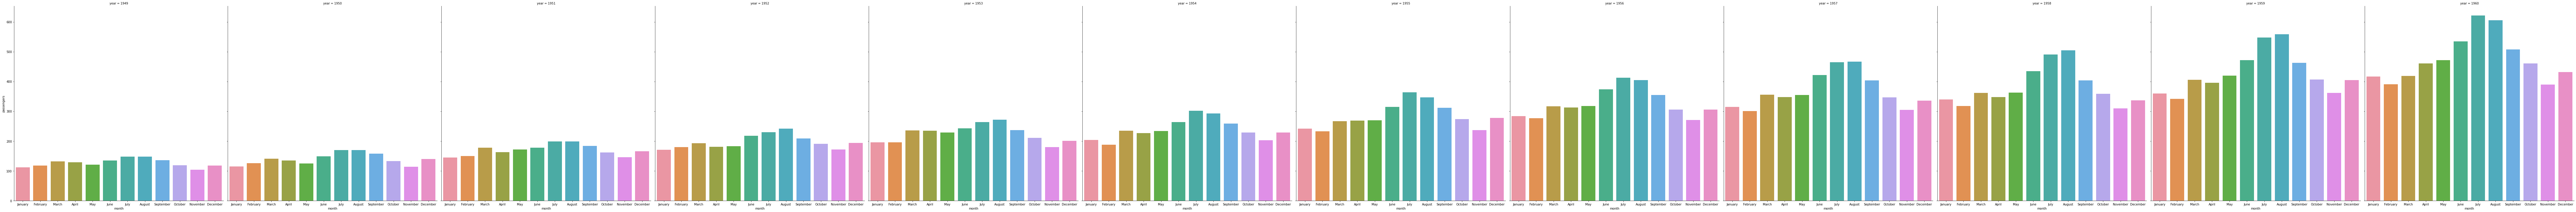

In [80]:
# Flights Pivot Table
sns.catplot(data = flights,
            x = 'month',
            y = 'passengers',
            col = 'year',
            kind = 'bar',
            height = 10);

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [ ]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [ ]:
##### YOUR CODE HERE #####